<a href="https://colab.research.google.com/github/c-engineering-dooley/FoodHub/blob/main/FoodHub_CDooley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FoodHub Full-Code Data Analysis
---
Notebook Author/Analyst: Chaz Dooley<br>University of Texas at Austin - McCombs School of Business


##Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.<br><br>


##Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.<br><br>


##Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.<br><br>


##Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

###Environment Setup (Installations and Imports)

This notebook utilizes Python, as well as several Python packages. The primary libraries in use for this analysis notebook are:
* NumPy: an open-source Python library used for complex numerical computing
* Pandas: an open-source Python library designed to support data manipulation and analysis
* Matplotlib: an open-source Python library useful for supporting data visualization
* Seaborn: an open-source Python library built on Matplotlib, designed for constructing complex statistical graphics; integrates with Pandas

Install the proper versions using ``` !pip install  ```





In [ ]:
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

Import each individual library using the ``` import ``` command

In [ ]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

# importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


*OPTIONAL: Cosmetic Functions*

In [ ]:
%matplotlib inline
# ensures plots generate within the notebook

plt.style.use('seaborn-v0_8') # applies predefined visual themes to generated plots
sns.set_style('whitegrid') # applies 'whitegrid' background style to Seaborn plot generations

SIZE_DEFAULT = 14 # setting a default font size for the entire notebook
plt.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans"] # setting specific fonts to be utilized
plt.rcParams["font.family"] = "sans-serif" # setting the font family
plt.rcParams["font.size"] = SIZE_DEFAULT # setting general font size to default
plt.rcParams["axes.titlesize"] = SIZE_DEFAULT # setting plot title font size to default
plt.rcParams["axes.labelsize"] = SIZE_DEFAULT # setting axes label font size to default
plt.rcParams["xtick.labelsize"] = SIZE_DEFAULT # setting y-axis tick label font size to default
plt.rcParams["ytick.labelsize"] = SIZE_DEFAULT # setting y-axis tick label font size to default

###Data Checking

Before applying any analysis techniques, we must first check to ensure all of our data is usable.

First, lets load our data...

In [ ]:
path = "/content/foodhub_order.csv" # path to local FoodHub csv file
data = pd.read_csv(path) # reading in the .csv from the preset path

Now to ensure our data loaded properly, we will check the ```head()``` and ```tail()``` of our .csv

In [ ]:
data.head() # outputs first five data entries

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
data.tail() # outputs last five data entries

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


Our data has loaded in properly. Now we will use a variety of functions to check the usability of our data.

In [ ]:
print("Our data has", data.shape[0], "rows and", data.shape[1], "columns of data.\n")
# shape[] returns either the number of rows or columns of a given DataFrame

s = data.info()
# checking the various datatypes of the different columns in the dataset

missing_count = data.isnull().sum()
print("\nNull Values Per Data Field (Column)\n"+ str(missing_count.to_string()))
# checking for any existing null values in the dataset

Our data has 1898 rows and 9 columns of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB

Null Values Per Data Field (Column)
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating      

Our data seems to be usable, except our 'rating' field is of type object, yet presents mostly numerical values. In order to change the datatyping of the field, we will run ```to_numeric```

In [ ]:
data['rating'] = pd.to_numeric(data['rating'], errors = 'coerce') # casts non-numeric datatypes into numerical datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


Now that we can see out 'rating' field has been changed to a numeric datatype, we can generate a statistical summary of our numerical data, and count the number of 'NaN' values listed under the 'rating' field. These 'NaN' values represent customers who decided not to leave a rating after recieving their food delivery from FoodHub.

In [ ]:
data.describe()
# prints a statistical description of the data

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


In [ ]:
print ("There are", int(data['rating'].isna().sum()), "order ratings listed as \'NaN/Not Given' in this dataset.")
# sums all of the values in 'rating' that are listed as 'NaN'

There are 736 order ratings listed as 'NaN/Not Given' in this dataset.


Our output of 'NaN' values can be validated by observing the dataset description output above. Our 'rating' field only has a count of 1162, while the rest of our numerical fields have 1898 -- the number of entries in the dataset. Subtracting 1898 by 1162, we receive a familar value of 736, the number of 'NaN' values existing within the 'rating' field.

###Univariate Exploration

Our data is now ready to analyze. We will begin our analysis by understanding each individual attribute of our dataset.

In [ ]:
print("There are", data['order_id'].nunique(), "unique order IDs in this dataset.")
# counts the number of unique values located in 'order_id'

There are 1898 unique order IDs in this dataset.


In [ ]:
print("There are", data['customer_id'].nunique(), "unique customer IDs in this dataset.")
# counts the number of unique values located in 'customer_id'

There are 1200 unique customer IDs in this dataset.


In [ ]:
print("There are", data['restaurant_name'].nunique(), "unique restaurant names in this dataset.")
# counts the number of unique values located in 'restaurant_name'

There are 178 unique restaurant names in this dataset.


In [ ]:
print("There are", data['cuisine_type'].nunique(), "unique cuisine types in this dataset.")
# counts the number of unique values located in 'cuisine_type'

There are 14 unique cuisine types in this dataset.


While there are **far** too many order IDs, customer IDs, and restaurant names to plot, there are not too many cuisine types. Let's make a univariate visualization of our cuisine types.

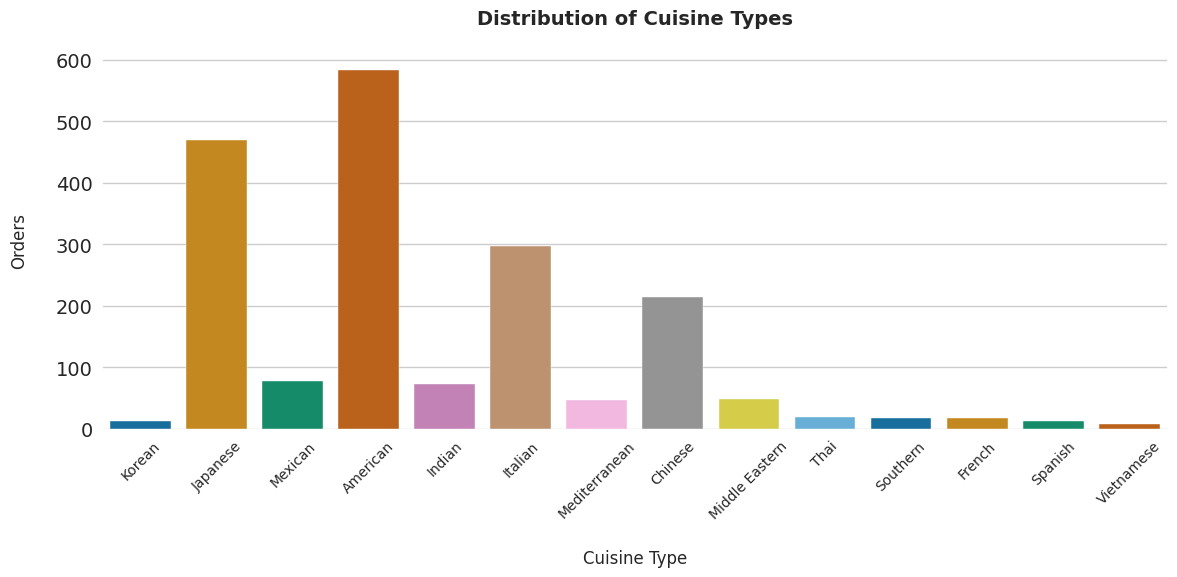

In [ ]:
plt.figure(figsize = (12,6)) # alters the size of the data figure

vis = sns.countplot(data = data, x = 'cuisine_type', hue = 'cuisine_type', palette = sns.color_palette('colorblind', n_colors = data['cuisine_type'].nunique())) # assigning plot to a variable

vis.set_title('Distribution of Cuisine Types', fontsize = 14, fontweight = 'bold', pad = 20) # setting plot title
vis.set_xlabel('Cuisine Type', fontsize = 12, labelpad = 20) # setting x-axis label
vis.set_ylabel('Orders', fontsize = 12, labelpad = 20) # setting y-axis label
vis.tick_params(axis = 'x', rotation = 45, labelsize = 10) # rotates and resizes x-axis tick labels

plt.tight_layout() # prevents labels overlaff/cutoff
plt.show() # displays data plot

From this plot, we can see that American, Japanese, Italian, and Chinese food are highly preferred over every other cuisine type, with American cuisine being favored the most.

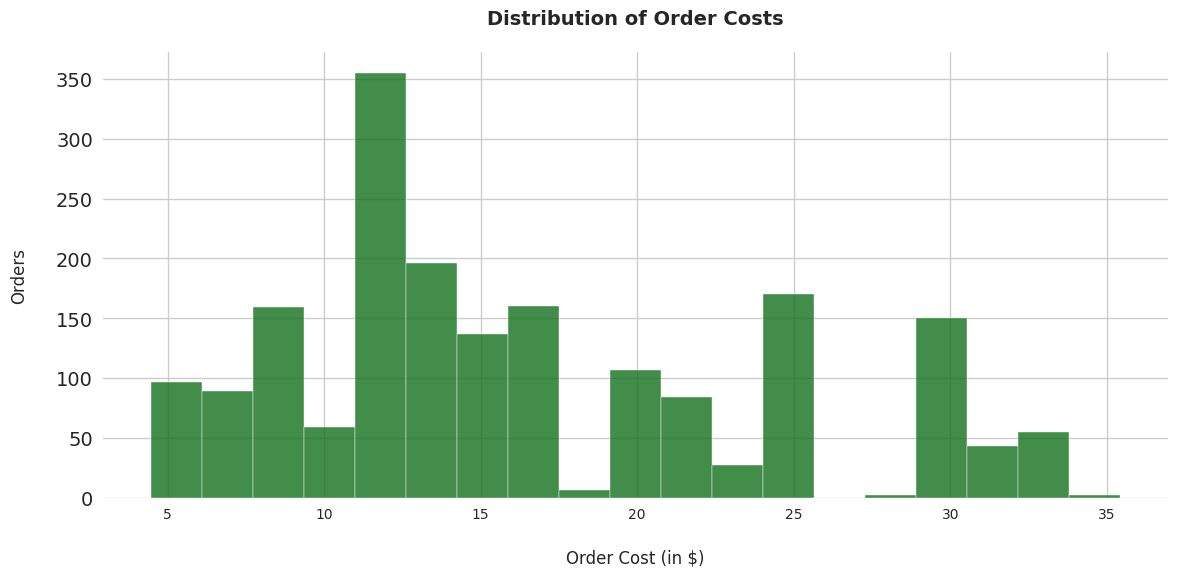

In [ ]:
plt.figure(figsize = (12,6))

vis = sns.histplot(data = data, x = 'cost_of_the_order', color = sns.color_palette('dark')[2], alpha = .8)

vis.set_title('Distribution of Order Costs', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Order Cost (in $)', fontsize = 12, labelpad = 20)
vis.set_ylabel('Orders', fontsize = 12, labelpad = 20)
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()
plt.show()

From the histogram above, we can see our order costs are highly inconsistent. Our graph has a heavily right-skewed, unimodal distribution. Around the area of $11-13, we see a large spike.

From the box plot below, we can see a strongly positive distribution, with the median falling directly to the left of our IQR at around $14. The central 50% of our data spans from \$12 to \$22. The left whisker falls within \$4-12, and the right whisker falls within \$22-36. There are no outliers in this data.

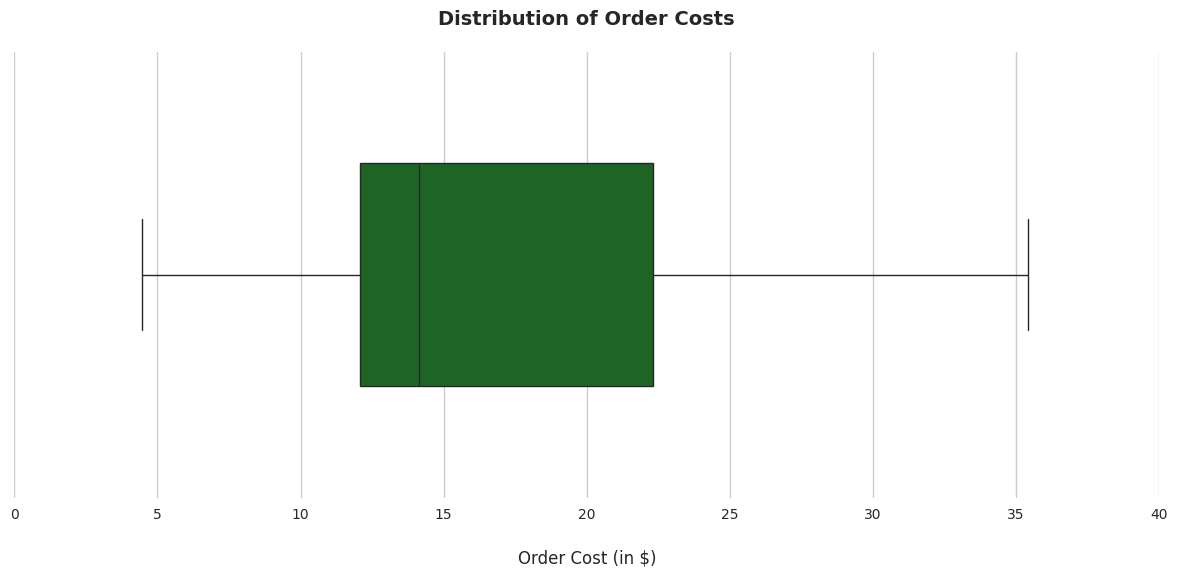

In [ ]:
plt.figure(figsize=(12, 6))

vis = sns.boxplot(data = data, x = 'cost_of_the_order', color = sns.color_palette('dark')[2], width = 0.5)

vis.set_title('Distribution of Order Costs', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Order Cost (in $)', fontsize = 12, labelpad = 20)
vis.set_xticks(np.arange(0, 45, 5))
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()
plt.show()

In [ ]:
print("There are", data['day_of_the_week'].nunique(), "unique types of days in this dataset.")
# counts the number of unique values located in 'day_of_the_week'

There are 2 unique types of days in this dataset.


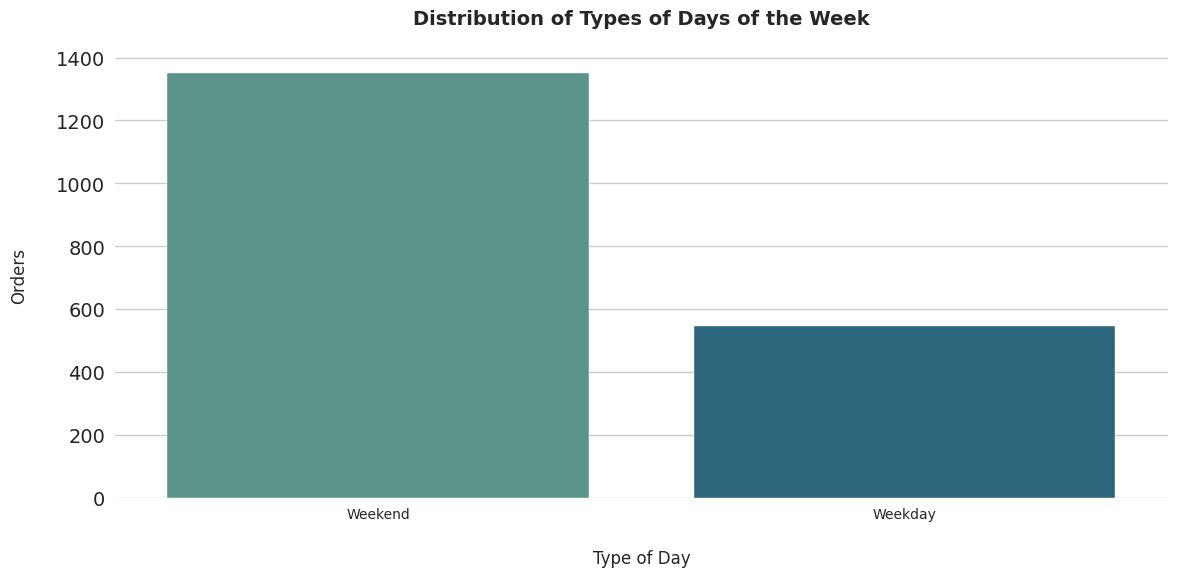

In [ ]:
plt.figure(figsize = (12,6))

vis = sns.countplot(data = data, x = 'day_of_the_week', hue = 'day_of_the_week', palette = sns.color_palette('crest', n_colors = data['day_of_the_week'].nunique()))

vis.set_title('Distribution of Types of Days of the Week', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Type of Day', fontsize = 12, labelpad = 20)
vis.set_ylabel('Orders', fontsize = 12, labelpad = 20)
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()
plt.show(vis)

From the above bar graph, we can see a heavy preference for ordering food from FoodHub on the weekend instead of the weekday.

In [ ]:
print("There are", data['rating'].nunique(), "unique ratings in this dataset.")
# counts the number of unique values located in 'rating'

There are 3 unique ratings in this dataset.


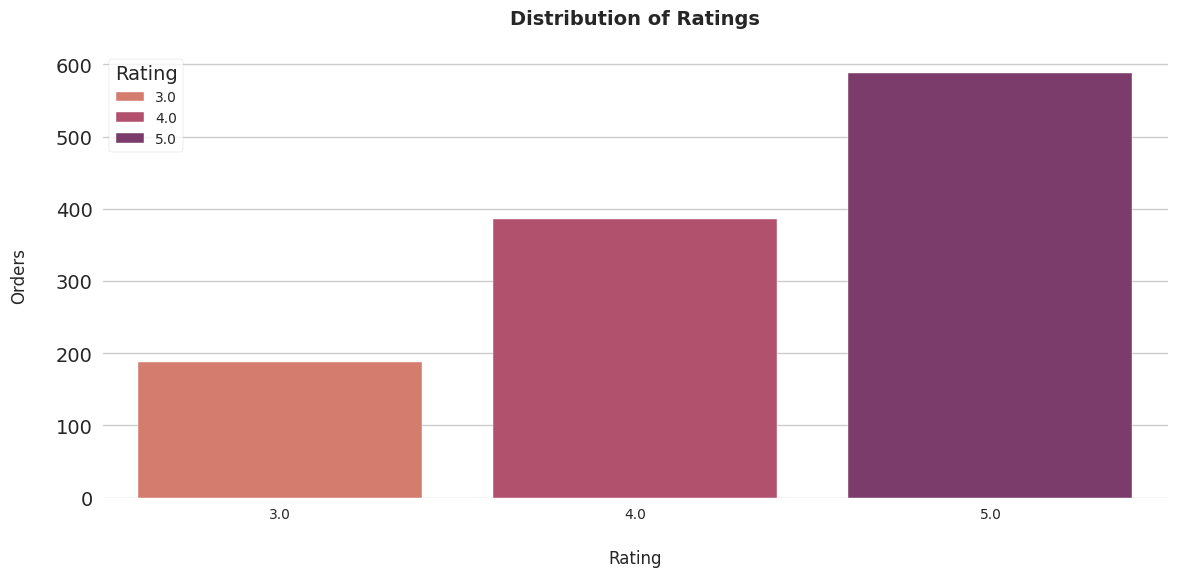

In [ ]:
plt.figure(figsize = (12,6))

vis = sns.countplot(data = data, x = 'rating', hue = 'rating', palette = sns.color_palette('flare', n_colors = data['rating'].nunique()))

vis.set_title('Distribution of Ratings', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Rating', fontsize = 12, labelpad = 20)
vis.set_ylabel('Orders', fontsize = 12, labelpad = 20)
vis.tick_params(axis = 'x', labelsize = 10)

plt.legend(frameon = True) # alters the legend frame/background
sns.move_legend(vis, loc = "best", title = "Rating", fontsize = 10) # alters the positioning, font, and title of the legend
plt.tight_layout()
plt.show(vis)

From the bar graph above, we can see a distribution of ratings submitted by customers who have received their orders. Overall, there are a larger number of 5.0 rating, less 4.0 ratings, and the least number of 3.0 ratings.

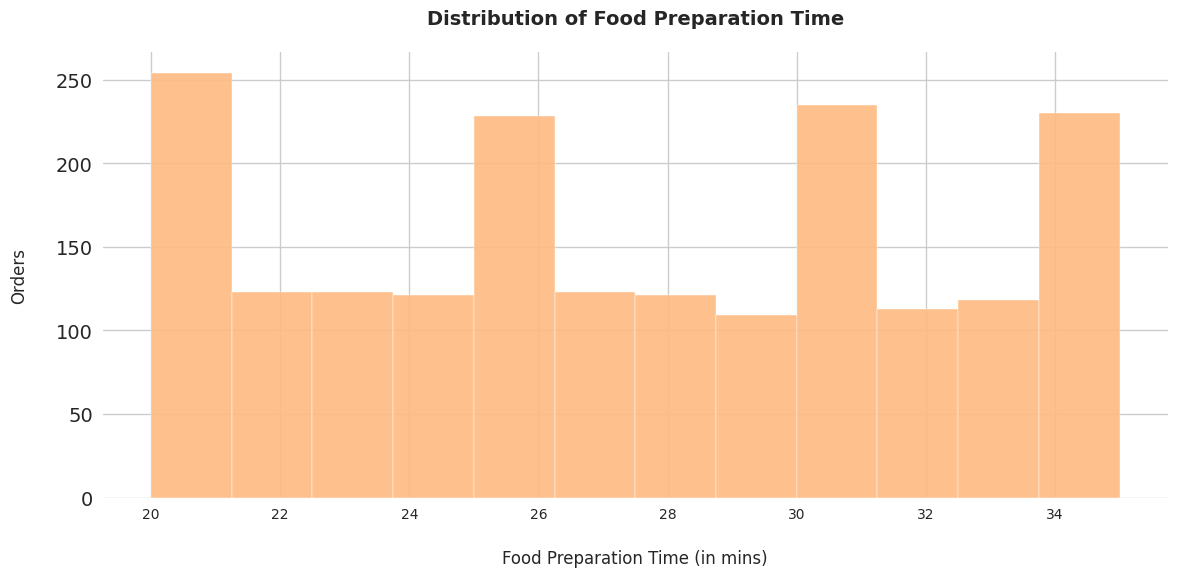

In [ ]:
plt.figure(figsize = (12,6))

vis = sns.histplot(data = data, x = 'food_preparation_time', color = sns.color_palette('magma')[-1], alpha = .9)

vis.set_title('Distribution of Food Preparation Time', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Food Preparation Time (in mins)', fontsize = 12, labelpad = 20)
vis.set_ylabel('Orders', fontsize = 12, labelpad = 20)
vis.set_xticks(np.arange(20, 36, 2)) # setting the range of x-axis tick values
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()
plt.show()

From the histogram above, we can see that prep times generally fluctuate. Our graph has a sightly right-skewed, multi-modal distribution. We have peaks in very specific areas, but overall, the distribution is rather consistent.

From the box plot below, we can see our data has a normal distribution, with the median falling directly in the middle of our IQR at 25 minutes. The medial 50% of our data spans from 23 mins to 31 mins, with a left whisker of 20 mins ≤ x < 23 mins and a right whisker of 31 mins < x ≤ 35 mins. There are no outliers in this spread of data.

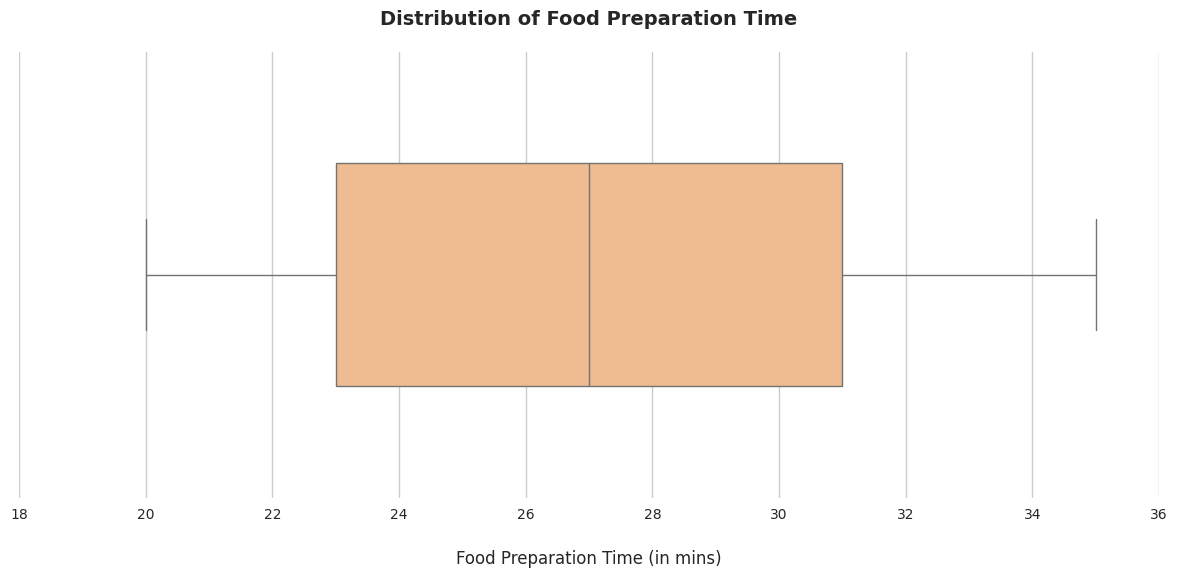

In [ ]:
plt.figure(figsize=(12, 6))

vis = sns.boxplot(data = data, x = 'food_preparation_time', color = sns.color_palette('magma')[-1], width = 0.5)

vis.set_title('Distribution of Food Preparation Time', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Food Preparation Time (in mins)', fontsize = 12, labelpad = 20)
vis.set_xticks(np.arange(18, 38, 2))
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()
plt.show()

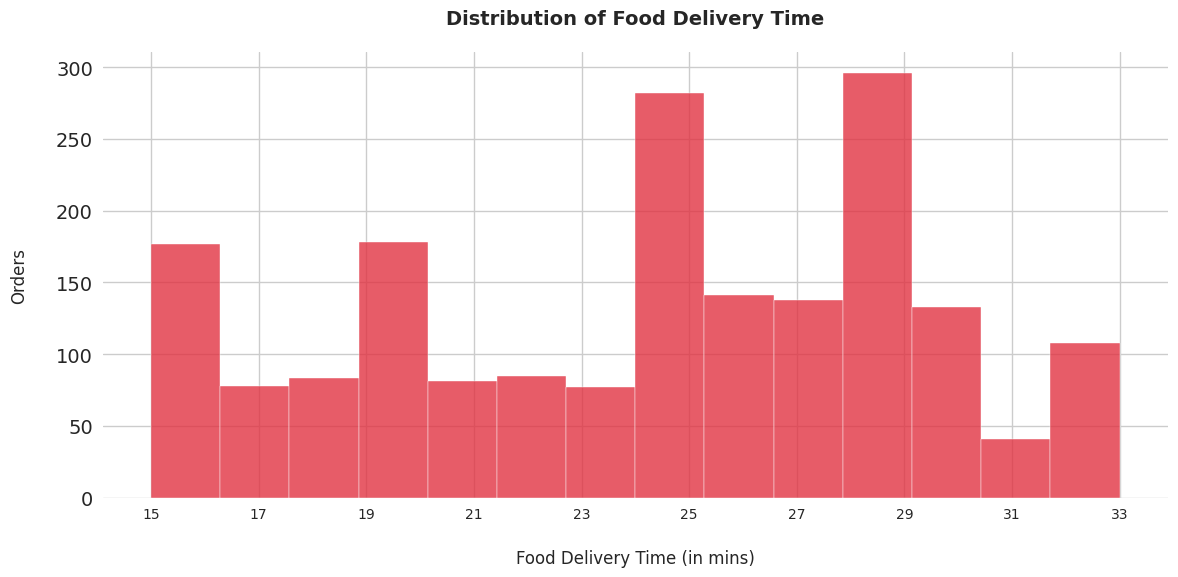

In [ ]:
plt.figure(figsize = (12,6))

vis = sns.histplot(data = data, x = 'delivery_time', color = sns.color_palette('rocket_r')[2], alpha = .8)

vis.set_title('Distribution of Food Delivery Time', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Food Delivery Time (in mins)', fontsize = 12, labelpad = 20)
vis.set_ylabel('Orders', fontsize = 12, labelpad = 20)
vis.set_xticks(np.arange(15, 34, 2))
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()
plt.show()

From the histogram above, we can see that delivery times generally tend to be around 24-25 mins or 28-29 mins. Our graph has a left-skewed, multi-modal distribution.

From the box plot below, we can understand the distribution from a different perspective. Our data has a slightly negative skew, with the median delivery time falling on the 25 minute mark. The middle 50% of our spread of times falls between an interquartile range of 20 mins and 28 mins. The lower 25% of our data falls within a range of 15 min ≤ x < 20 min. The higher 25% of our data falls within a range of 28 mins < x ≤ 33 mins. There are no outliers in our data.

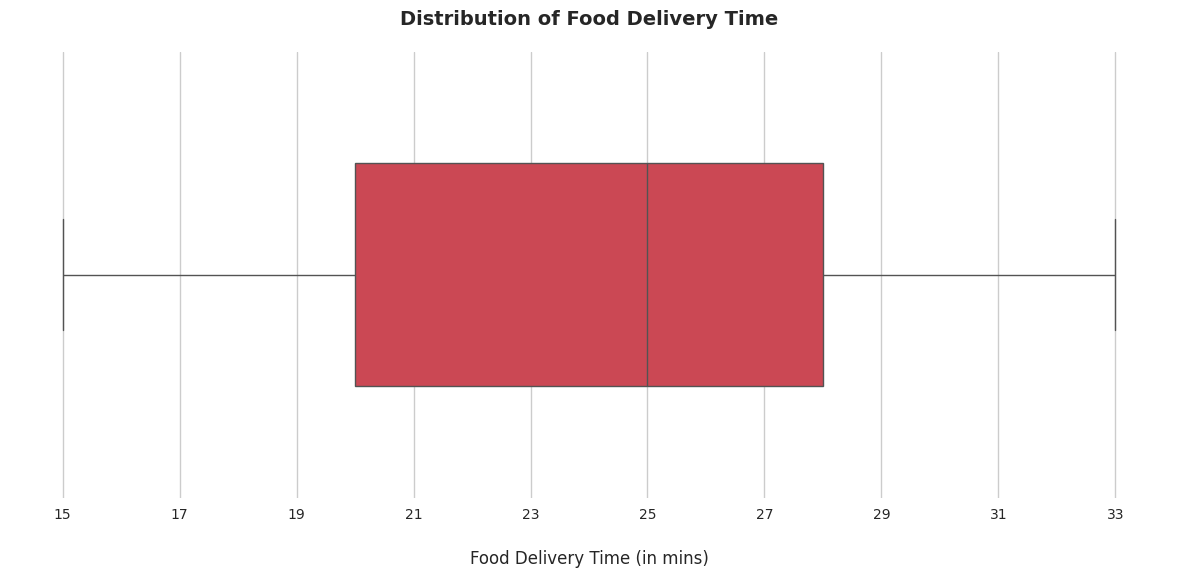

In [ ]:
plt.figure(figsize=(12, 6))

vis = sns.boxplot(data = data, x = 'delivery_time', color = sns.color_palette('rocket_r')[2], width = 0.5)

vis.set_title('Distribution of Food Delivery Time', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Food Delivery Time (in mins)', fontsize = 12, labelpad = 20)
vis.set_xticks(np.arange(15, 34, 2))
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()
plt.show()

###Scenario Analysis

We want to use the information provided to us to identify the most useful insights into how FoodHub can better enhance the experience of its users.

<br> We will use Panda DataFrame queries to answer the following questions:
* Which are the top 5 restaurants in terms of the number of orders received?
* Which is the most popular cuisine on weekends?
* What percentage of the orders cost more than 20 dollars?
* What is the mean order delivery time?
* The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.
<br>

---

Question 1: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
s = data['restaurant_name'].value_counts().head(5)
pd.DataFrame(s)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


Question 2: Which is the most popular cuisine on weekends?


In [ ]:
s = data[data['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)
pd.DataFrame(s)

,count
cuisine_type,
American,415


Question 3: What percentage of the orders cost more than 20 dollars?


In [ ]:
print("{:.2f}".format(data[data['cost_of_the_order'] > 20].value_counts().sum()/data.shape[0] * 100) + "% of all recorded orders cost more than $20.")

18.76% of all recorded orders cost more than $20.


Question 4: What is the mean order delivery time?


In [ ]:
mins = int(data['delivery_time'].mean()) # extracting the whole number from the average delivery time
secs = int(data['delivery_time'].mean() % 1 * 60) # extracting the decimal number from the average delivery time and translating the result into seconds
print("The average delivery time for all recorded orders is", mins, "mins and", secs, "seconds.")

The average delivery time for all recorded orders is 24 mins and 9 seconds.


Question 5: The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
s = data['customer_id'].value_counts().head(3)
pd.DataFrame(s)

,count
customer_id,
52832,13
47440,10
83287,9


###Bivariate and Multivariate Exploration

We have analyzed the distributions of each individual data field located within our schema of FoodHub order. Now we need to explore the relationships these variables have with one another.

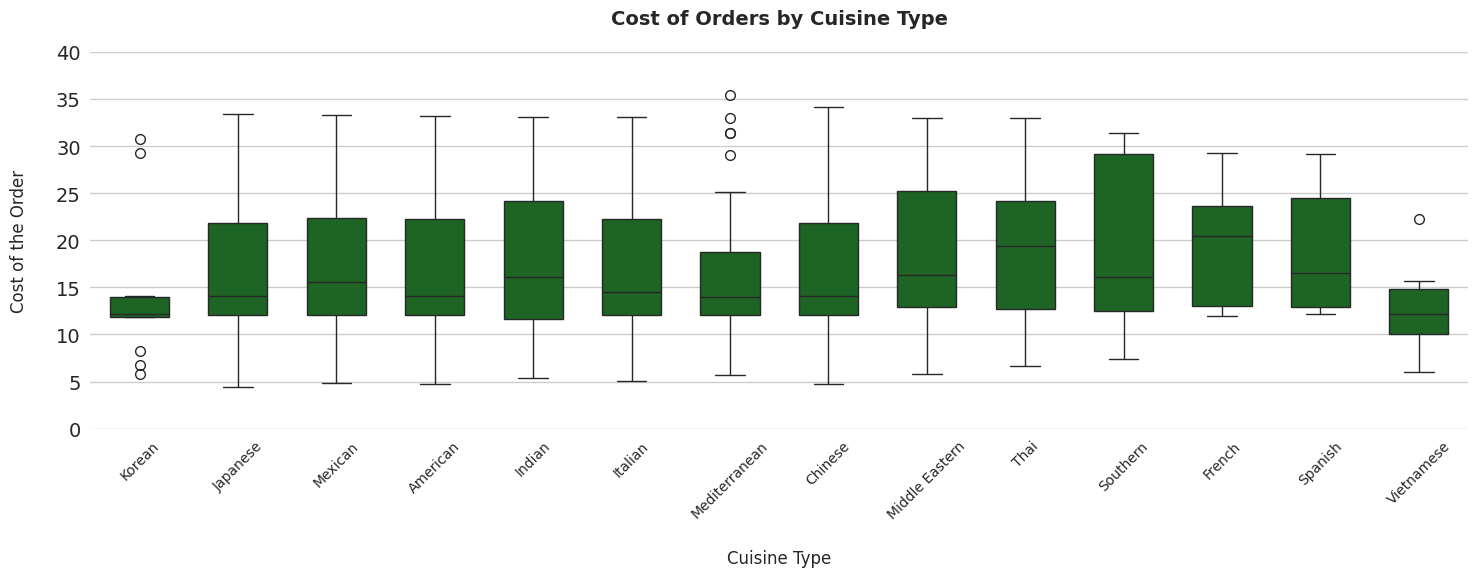

In [ ]:
plt.figure(figsize = (15,6))
vis = sns.boxplot(data = data, x = 'cuisine_type', y = 'cost_of_the_order', legend = False, color = sns.color_palette('dark')[2], width = 0.6)

vis.set_title('Cost of Orders by Cuisine Type', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Cuisine Type', fontsize = 12, labelpad = 20)
vis.set_ylabel('Cost of the Order', fontsize = 12, labelpad = 20)
vis.set_yticks(np.arange(0, 45, 5)) # setting the y-axis tick values
vis.tick_params(axis = 'x', rotation = 45, labelsize = 10)

plt.tight_layout()
plt.show()


From the above box plot, we can see a distribution of order costs across the various cuisine types available to us.
<br>Through this chart, we can observe multiple things:
* French cuisine has the highest median order cost, while Korean cuisine has the lowest median.
* Mediterranean cuisine shows the highest maximum order cost, while Vietnamese cuisine shows one of the lowest maximums.
* Spanish cuisine exhibits the highest minimum order cost, whereas Japanese cuisine shows the lowest minimum.
* Korean cuisine has the greatest number of outliers, though Mediterranean cuisine shows the most extreme high-cost outliers.
* Both Mediterranean and Korean cuisines contain high-cost outliers, while Korean also includes multiple low-cost outliers.
* Most cuisines display right-skewed (positively skewed) distributions, indicating more higher-cost orders. Thai and French, however, appear more balanced or slightly left-skewed compared to the others.

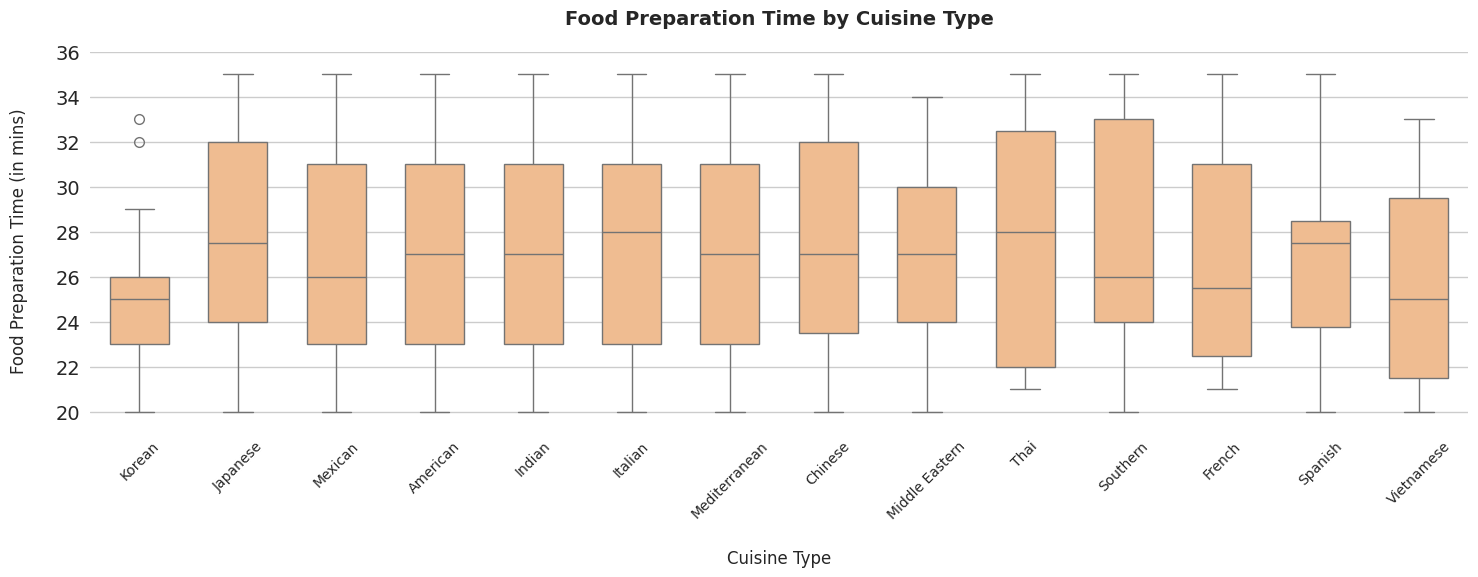

In [ ]:
plt.figure(figsize = (15,6))
vis = sns.boxplot(data = data, x = 'cuisine_type', y = 'food_preparation_time', legend = False, color = sns.color_palette('magma')[-1], width = 0.6)

vis.set_title('Food Preparation Time by Cuisine Type', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Cuisine Type', fontsize = 12, labelpad = 20)
vis.set_ylabel('Food Preparation Time (in mins)', fontsize = 12, labelpad = 20)
vis.set_yticks(np.arange(20, 38, 2))
vis.tick_params(axis = 'x', rotation = 45, labelsize = 10)

plt.tight_layout()
plt.show()


From the above box plot, we can see a distribution of food preparation times across the various cuisine types available to us.
<br>Through this chart, we can observe multiple things:
* Italian and Thai cuisine have the highest median prep time, while Vietnamese cuisine has the lowest median.
* Korean cuisine has the greatest number of outliers.
* Despite having the lowest net food prep time, Korean has high-valued outliers.

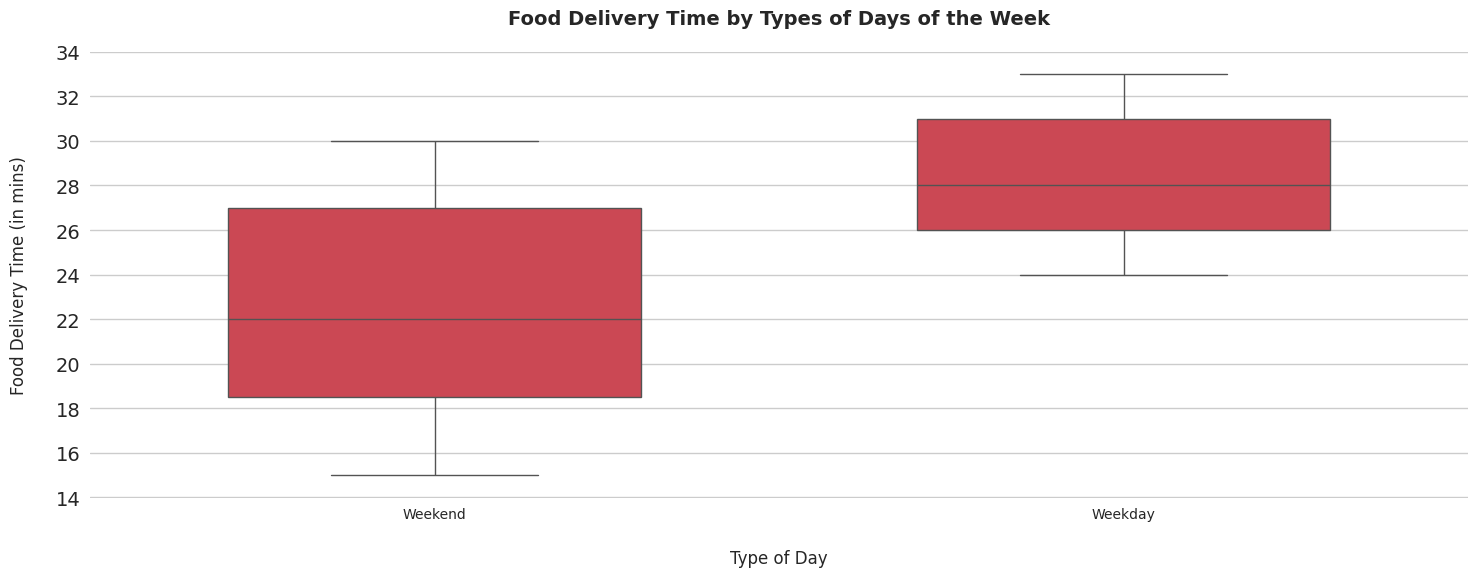

In [ ]:
plt.figure(figsize = (15,6))
vis = sns.boxplot(data = data, x = 'day_of_the_week', y = 'delivery_time', legend = False, color = sns.color_palette('rocket_r')[2], width = 0.6)

vis.set_title('Food Delivery Time by Types of Days of the Week', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Type of Day', fontsize = 12, labelpad = 20)
vis.set_ylabel('Food Delivery Time (in mins)', fontsize = 12, labelpad = 20)
vis.set_yticks(np.arange(14, 36, 2))
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()
plt.show()


From the above box plot, we can see a distribution of food delivery times depending on whether the day of ordering was a weekday or a weekend.
<br>Through this chart, we can observe multiple things:
* Weekends have the lowest median delivery time.
* Weekdays show the highest maximum delivery time, while weekends shows the lowest minimum delivery time.
* Weekends have the largest overall spread in delivery times.

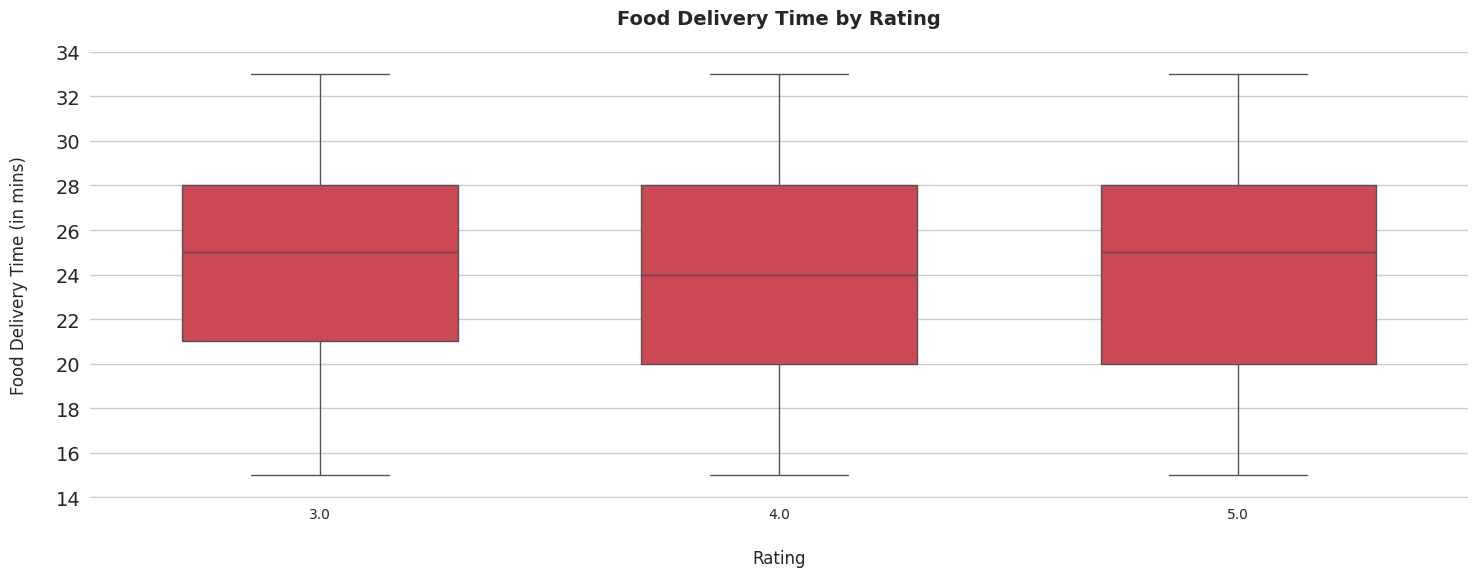

In [ ]:
plt.figure(figsize = (15,6))
vis = sns.boxplot(data = data, x = 'rating', y = 'delivery_time', legend = False, color = sns.color_palette('rocket_r')[2], width = 0.6)

vis.set_title('Food Delivery Time by Rating', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Rating', fontsize = 12, labelpad = 20)
vis.set_ylabel('Food Delivery Time (in mins)', fontsize = 12, labelpad = 20)
vis.set_yticks(np.arange(14, 36, 2))
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()
plt.show()


From the above box plot, we can see a distribution of food delivery times relative to the rating the order received after the customer's order was successfully delivered.
<br>Through this chart, we can observe multiple things:
* The differences in spread between each rating is very minimal, with the ranges of each plot being exactly the same.
* Delivery time may not have as large of an effect for ratings greater than 3.0.
* For ratings of 3.0, the plot suggests very slightly that higher delivery time may lead customers to submit a 3.0 rating.

From the point plot below, we can observe similar inferences. The central dendencies of each plot are within 1 minute of each other.


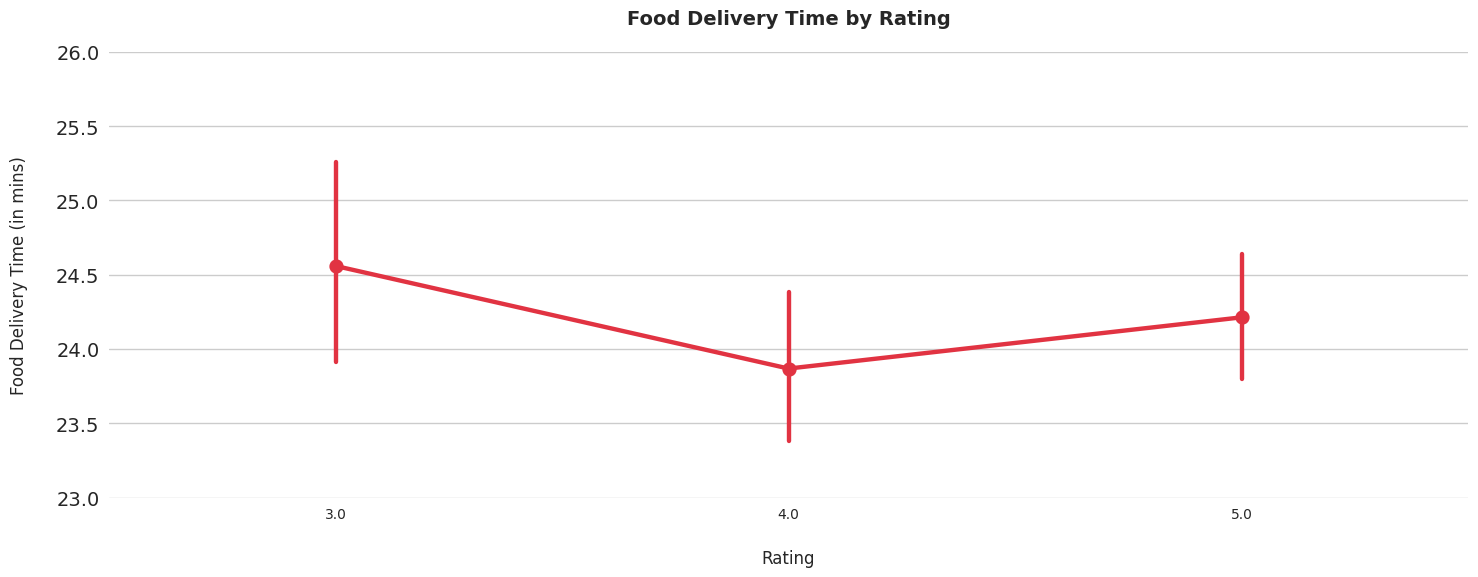

In [ ]:
plt.figure(figsize = (15, 6))

vis = sns.pointplot(data = data, x = 'rating', y = 'delivery_time', color = sns.color_palette('rocket_r')[2], legend = False)

vis.set_title('Food Delivery Time by Rating', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Rating', fontsize = 12, labelpad = 20)
vis.set_ylabel('Food Delivery Time (in mins)', fontsize = 12, labelpad = 20)
vis.set_yticks(np.arange(23, 26.5, .5))
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()

plt.show()


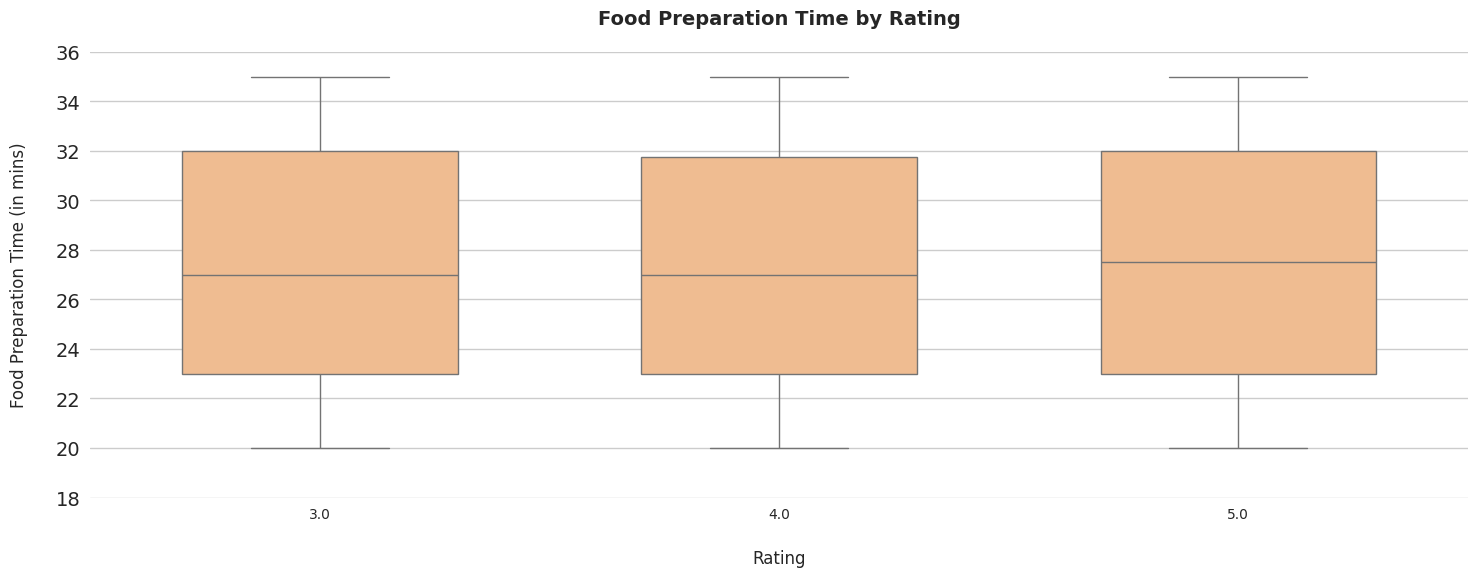

In [ ]:
plt.figure(figsize = (15,6))
vis = sns.boxplot(data = data, x = 'rating', y = 'food_preparation_time', legend = False, color = sns.color_palette('magma')[-1], width = 0.6)

vis.set_title('Food Preparation Time by Rating', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Rating', fontsize = 12, labelpad = 20)
vis.set_ylabel('Food Preparation Time (in mins)', fontsize = 12, labelpad = 20)
vis.set_yticks(np.arange(18, 38, 2))
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()
plt.show()


From the above box plot, we can see a distribution of food prep times relative to the rating the order received after the customer's order was successfully delivered.
<br>Through this chart, we can observe multiple things:
* Similar to the deliver times, the differences in spread between each rating is very minimal, with the ranges of each plot being exactly the same.
* The 5.0 rating plot is 1 minute higher than 3.0 and 4.0.
* The IQR for each plot is the same except for 4.0, where the Q3 is just under the measurement for 3.0 and 5.0.

From the point plot below, we can observe similar inferences. The central dendencies of each plot are nearly identical, within .6 seconds of one another.


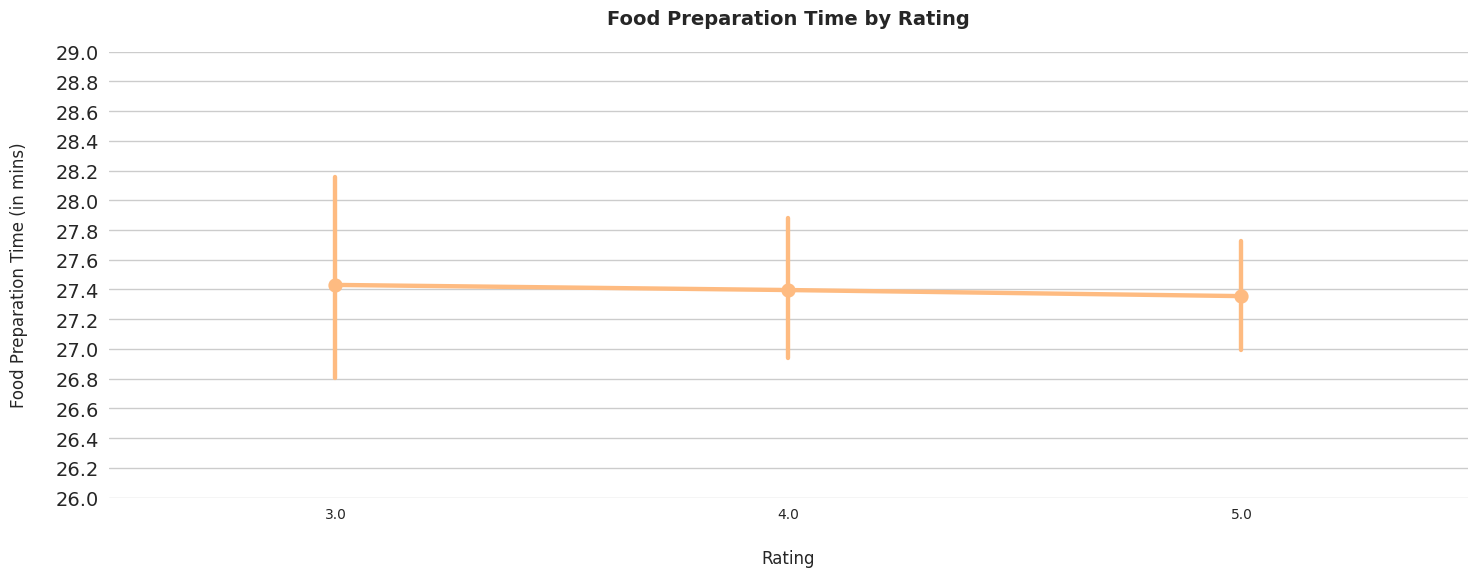

In [ ]:
plt.figure(figsize = (15, 6))

vis = sns.pointplot(data = data, x = 'rating', y = 'food_preparation_time', color = sns.color_palette('magma')[-1], legend = False)

vis.set_title('Food Preparation Time by Rating', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Rating', fontsize = 12, labelpad = 20)
vis.set_ylabel('Food Preparation Time (in mins)', fontsize = 12, labelpad = 20)
vis.set_yticks(np.arange(26, 29.2, .2))
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()

plt.show()


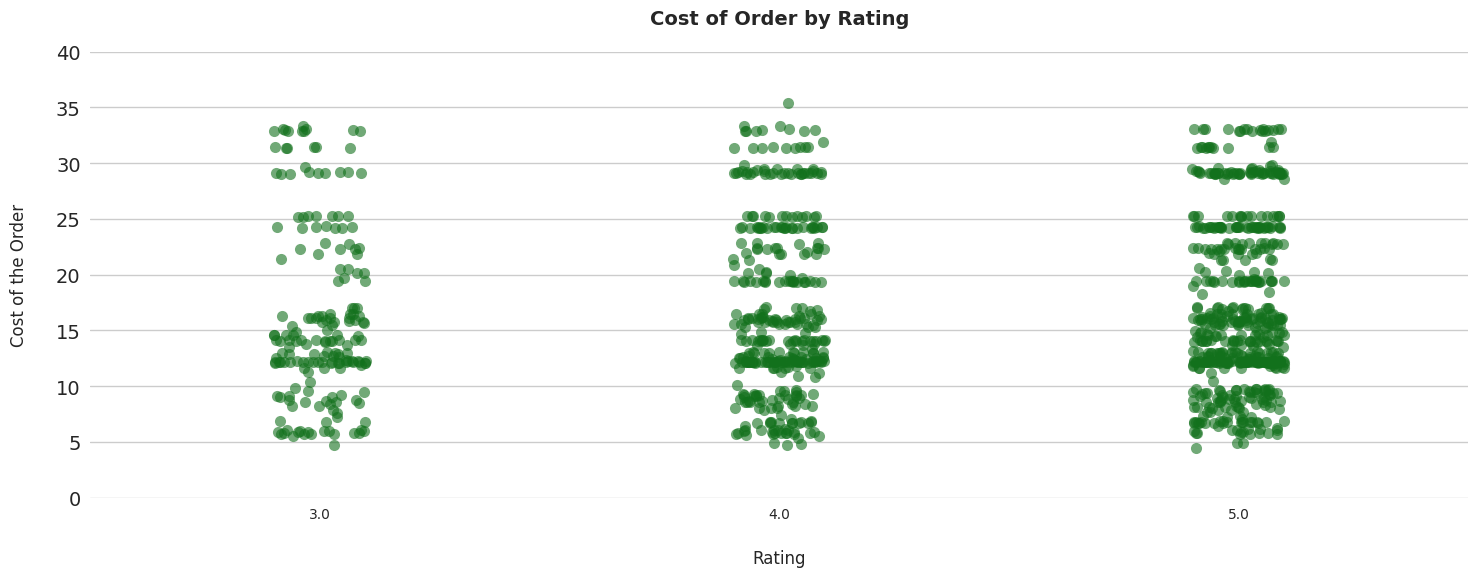

In [ ]:
plt.figure(figsize = (15, 6))

vis  =  sns.stripplot(data = data, x = 'rating', y = 'cost_of_the_order', legend = False, alpha = .6, size = 8, color = sns.color_palette('dark')[2])

vis.set_title('Cost of Order by Rating', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Rating', fontsize = 12, labelpad = 20)
vis.set_ylabel('Cost of the Order', fontsize = 12, labelpad = 20)
vis.set_yticks(np.arange(0, 45, 5))
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()
plt.show()

From the above strip plot, we can see a distribution of order costs relative to the rating the order received after the customer's order was successfully delivered.
<br>Through this visual, we can observe multiple things:
* There are more 5.0 ratings, less 4.0 ratings, and the least 3.0 ratings.
* Generally, orders the lower costs receive ratings.

From the point plot below, we can observe the following:
* There are more 5.0 ratings, less 4.0 ratings, and the least 3.0 ratings.
* Higher costs are on average associated with higher ratings.
* The spread across the 3.0 rating is much larger than across 4.0 and 5.0 ratings, meaning there is another factor contributing more strongly to the submission of a 3.0 rating in comparison to high or low order costs.

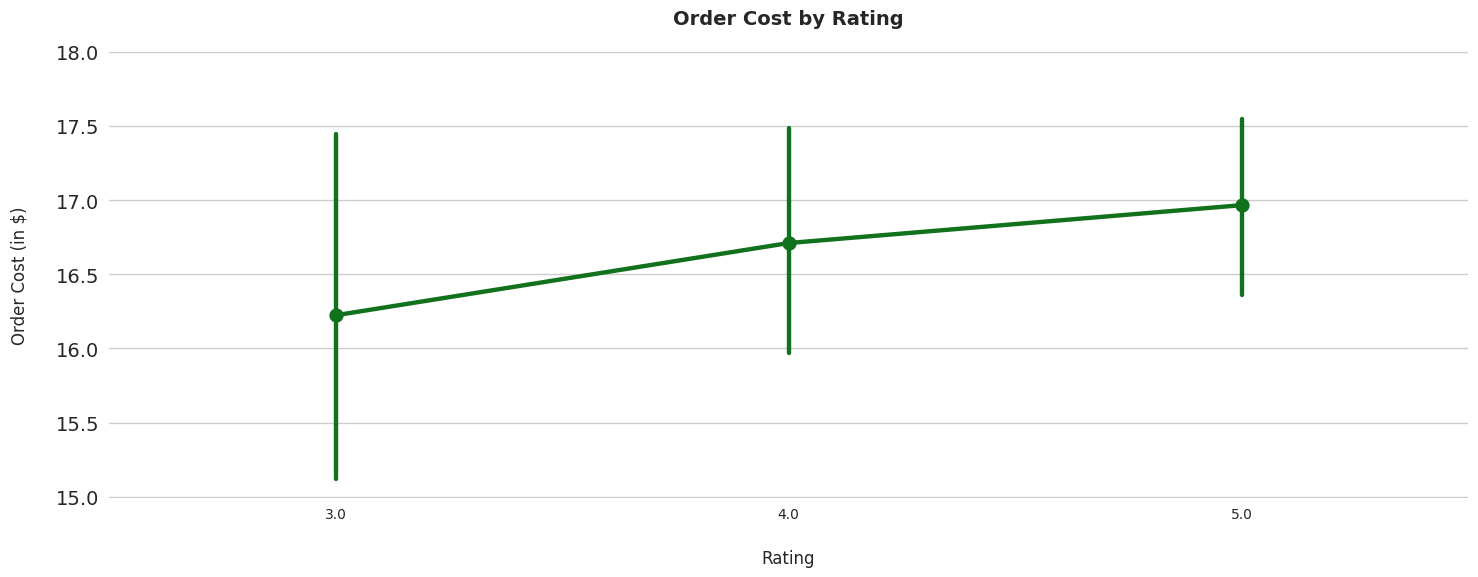

In [ ]:
plt.figure(figsize = (15, 6))

vis = sns.pointplot(data = data, x = 'rating', y = 'cost_of_the_order', color = sns.color_palette('dark')[2], legend = False)

vis.set_title('Order Cost by Rating', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xlabel('Rating', fontsize = 12, labelpad = 20)
vis.set_ylabel('Order Cost (in $)', fontsize = 12, labelpad = 20)
vis.set_yticks(np.arange(15, 18.5, .5))
vis.tick_params(axis = 'x', labelsize = 10)

plt.tight_layout()

plt.show()


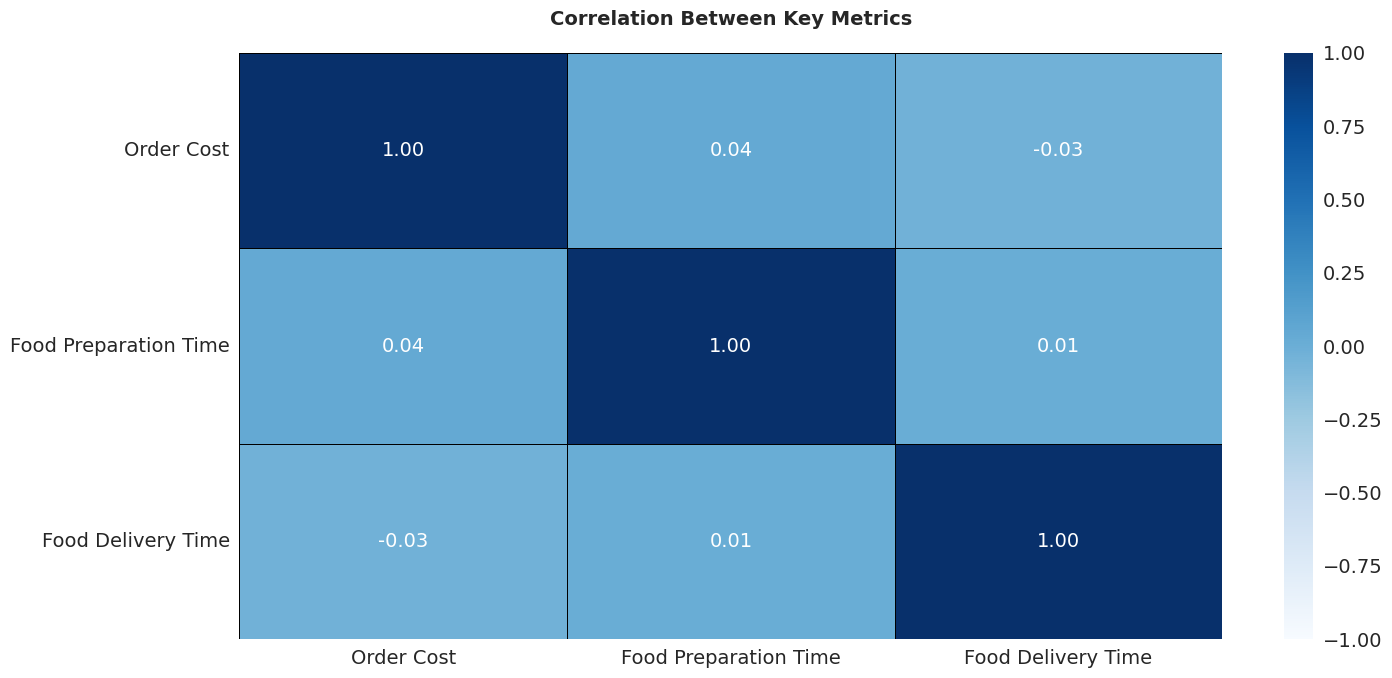

In [ ]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

plt.figure(figsize = (15, 7))

vis = sns.heatmap(data[col_list].corr(), annot = True, fmt = ".2f", cmap = 'Blues', vmin = -1, vmax = 1, linewidths = 0.5, linecolor = 'black')

vis.set_title('Correlation Between Key Metrics', fontsize = 14, fontweight = 'bold', pad = 20)
vis.set_xticklabels(['Order Cost', 'Food Preparation Time', 'Food Delivery Time'])
vis.set_yticklabels(['Order Cost', 'Food Preparation Time', 'Food Delivery Time'])

plt.tight_layout()
plt.show()


From the above heatmap, we can see a chart comparing the relative correlation between various combinations of key attributes in this dataset.
<br>Through this visual, we can observe the following:
* Though very weak, there is a 0.04 positive correlation between food prep time and order cost. Following, there is a 0.01 positive correlation between food prep time and delivery time. It can be inferred that these combinations of attributes either typically have no effect on one another, besides occasional or rare instances. Another inference may assume that the positive correlation between these combinations may have a small, but progressively growing effect on one another as time continues, meaning immediate effects of such a correlation are highly unlikely.
* Similarly to the positive correlations, a weak negative correlation can be found between delivery time and order cost. This may mean that though the link between each attribute is very weak and unreliable, it is possible that rare events may cause one attribute to be negatively effected by the other or over time, the potential for negative effects may grow.  

We have analyzed the various relationship between variables available to us in this dataset. One thing we have yet to measure, however, is the revenue of each restaurant.

In [ ]:
s = data.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(15)
pd.DataFrame(s)


,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


From the previous data query, we can see the following observations:
* Shake Shack is leading in revenue by a large margin (>$1,000).
* The “Blue Ribbon” brand appears multiple times, showing its popularity across different cuisines. The "RedFarm" brand also appears twice.
* Sushi restaurants and American cuisine appear to dominate the food market.
* After the top four restaurants, the revenue drops sharply and slowly declines by increments of <\$100.

###Scenario Analysis

We want to use the information provided to us to identify the most useful insights into how FoodHub can better enhance the experience of its users.

<br> We will use Panda DataFrame queries to answer the following questions:
* The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.
* The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.
* The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)
* The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?
<br>

---

Question 6: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
company_stats = data.groupby('restaurant_name')['rating'].agg(count='count', avg='mean')
# grouping column 'restaurant_name' based on rating and aggregating the count non-null ratings and the average rating overall for each restaurant; saving the result to a variable
s = company_stats[(company_stats['count'] > 50) & (company_stats['avg'] > 4)] # filtering data based on count and mean
pd.DataFrame(s)

,count,avg
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


Question 7: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.


In [ ]:
def compute_rev(order): # function used to compute the revenue gained based on order total
  if order > 20:
    return order * .25
  elif order > 5:
    return order * .15
  else:
    return 0

data['company_revenue'] = data['cost_of_the_order'].apply(compute_rev)
# applies the previous function to the entire 'cost_of_the_order' field and saves the result to a new column

print("The company has made $" + "{:.2f}".format(data['company_revenue'].sum()) + " in revenue from the current list of orders.")

The company has made $6166.30 in revenue from the current list of orders.


Question 8: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
print("{:.2f}".format(data[data['food_preparation_time'] + data['delivery_time'] > 60].shape[0]/data.shape[0] * 100) + "% of the recorded orders take more than 60 minutes to be delivered after the order is placed.")

10.54% of the recorded orders take more than 60 minutes to be delivered after the order is placed.


Question 9: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?


In [ ]:
weekdays_deliv = data.loc[data['day_of_the_week'] == 'Weekday', 'delivery_time'].mean() # calculates the average delivery time on weekdays
weekends_deliv = data.loc[data['day_of_the_week'] == 'Weekend', 'delivery_time'].mean() # calculates the average delivery time on weekends

print ("Average Weekday Delivery Time:", int(weekdays_deliv), "minutes and", int(weekdays_deliv % 1 * 60), "seconds. ")
print ("Average Weekend Delivery Time:", int(weekends_deliv), "minutes and", int(weekends_deliv % 1 * 60), "seconds. ")
print ("The difference in delivery times between weekdays and weekends is", int((weekdays_deliv - weekends_deliv)), "minutes and", int((weekdays_deliv - weekends_deliv) % 1 * 60), "seconds. ")

Average Weekday Delivery Time: 28 minutes and 20 seconds. 
Average Weekend Delivery Time: 22 minutes and 28 seconds. 
The difference in delivery times between weekdays and weekends is 5 minutes and 52 seconds. 


###Conclusions and Recommendations

After completing an analysis of the provided FoodHub data, these are my conclusions and recommendations for the company. Each recommendation is made with the interest of enhancing the customer experience and earning additional revenue in mind.<br><br>

---
###**Cuisine**
---
**Conclusions:**<br>
* American, Japanese, Italian, and Chinese cuisines are the highest-preferred categories among customers.

* Sushi-focused Japanese restaurants perform very well, often generating higher total revenue than general Japanese restaurants.

* Blue Ribbon and RedFarm, well-known brands, consistently appear among the top restaurant performers. This demonstrates strong, brand-driven customer loyalty despite the cuisine variety.

* The top five most-ordered restaurants include multiple American and Italian eateries, which reinforces the dominance of these specific cuisines.
<br>

**Recommendations:**<br>
* Strengthen partnerships with American, Japanese, Italian, and Chinese restaurants to cater to existing demand.

* Prioritize connecting with reputable, high-quality brands. Name recognition strongly influences user trust and order volume.

* When targeting Japanese locations for domain expansion, focus on Sushi-specialty locations, as they demonstrate significantly stronger performance than general Japanese restaurants.

* Invest time and resources into developing marketing strategies surrounding  customer-preferred cuisine categories.
<br>

---
###**Pricing**
---
**Conclusions:**<br>
* Over 80% of all orders fall under $20, indicating a stronger overall preference for affordable, mid-range meals.

* The top-performing cuisines generally fall within a moderate price range (\$12-$24), which allows each restaurant to appeal to a wider customer base than restaurants of other cuisines.

* Higher-priced options still exist and are chosen by a smaller, more premium-oriented population of customers. This group is considered a minority, and is therefore not considered the core population for the functionality of FoodHub and any customer-experience-related enhancements.

* The combination of reasonable pricing + high popularity explains why American, Italian, and Japanese restaurants dominate order volume and revenue.
<br>

**Recommendations:**<br>
* Maintain a strong listing of restaurants within the \$12–$24 average order cost range, as this price band clearly reflects customer expectations.

* Implement pricing filters and introduce tags for outlying premium restaurants to assist with capturing the minority high-spending customer populus without discouraging average or cost-conscious customers.

<br>

---
###**Day of the Week**
---
**Conclusions:**<br>
* Weekends see significantly more orders.

* American food is the most popular cuisine on weekends.

* Delivery time and food preparation time do not present noticeable issues and remain relatively consistent across all days.
<br>

**Recommendations:**<br>
* Invest time and resources into developing in-app and notification-based marketing strategies surrounding naturally higher weekend traffic.

* Deliver targeted marketing, campaigns, and discounts surrounding weekend orders and American cuisine to employ the advantages of expected user traffic.

* Ensure sufficient and quality operational practices and staffing for weekend shifts due to higher user activity.<br>